In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
# importing datasets
filepath_train = './datasets/mnist_traindata.hdf5'
filepath_test = './datasets/mnist_testdata.hdf5'

with h5py.File(filepath_train,'r') as columns:
    xdata = np.array(columns['xdata'])
    ydata = np.array(columns['ydata'])

with h5py.File(filepath_test,'r') as columns:
    x_test = np.array(columns['xdata'])
    y_test = np.array(columns['ydata'])

print('-----------------------------------------------------')
print("Dimensions of Train Dataset [Features]: ",xdata.shape)
print("Dimensions of Train Dataset [Labels]  : ",ydata.shape)
print("Dimensions of Test Dataset  [Features]: ",x_test.shape)
print("Dimensions of Train Dataset [Labels]  : ",y_test.shape)
print('-----------------------------------------------------')

-----------------------------------------------------
Dimensions of Train Dataset [Features]:  (60000, 784)
Dimensions of Train Dataset [Labels]  :  (60000, 10)
Dimensions of Test Dataset  [Features]:  (10000, 784)
Dimensions of Train Dataset [Labels]  :  (10000, 10)
-----------------------------------------------------


In [3]:
# spliting (xdata and ydata) to train and validation data

x_train = xdata[0:50000]
y_train = ydata[0:50000]

x_val = xdata[50000:]
y_val = ydata[50000:]

In [28]:
# activation function and it's derivative

def softmax(x):
    exp_x = np.exp(x-np.max(x,axis=-1,keepdims=True))
    return exp_x / np.sum(exp_x,axis=-1,keepdims=True)

def tanh(x):
    return np.tanh(x)

def tanh_grad(x):
    return 1 - np.tanh(x) ** 2

def relu(x):
    return (x>0) * x

def relu_grad(x):
    return (x > 0) * 1

In [31]:
def training(w1, w2, w3, b1, b2, b3, batch_size, learn_rate, x, y,activation,grad):

    samples, data = x.shape
    weights1 = np.zeros([w1.shape[0], w1.shape[1]])
    weights2 = np.zeros([w2.shape[0], w2.shape[1]])
    weights3 = np.zeros([w3.shape[0], w3.shape[1]])
    bias1 = np.zeros([b1.shape[0],])
    bias2 = np.zeros([b2.shape[0],])
    bias3 = np.zeros([b3.shape[0],])
    accuracy = 0


    for i in range(samples):
        xi = x[i]
        # Activation function calculation:
        act_relu1 = activation(np.matmul(w1, xi) + b1)
        act_relu2 = activation(np.matmul(w2, act_relu1) + b2)
        act_relu3 = softmax(np.matmul(w3, act_relu2) + b3)
        
        if np.argmax(act_relu3) == np.argmax(y[i]):
            accuracy += 1

        # Computation of deltas:
        delta_3 = act_relu3 - y[i]
        weights3 += np.outer(delta_3, act_relu2.T)
        bias3 += delta_3
        delta_2 = np.matmul(w3.T, delta_3) * grad(act_relu2)
        weights2 += np.outer(delta_2, act_relu1.T)
        bias2 += delta_2
        delta_1 = np.matmul(w2.T, delta_2) * grad(act_relu1)
        weights1 += np.outer(delta_1, xi.T)
        bias1 += delta_1

        if (i + 1) % batch_size == 0:
            w1 -= learn_rate * (weights1 / batch_size)
            w2 -= learn_rate * (weights2 / batch_size)
            w3 -= learn_rate * (weights3 / batch_size)
            b1 -= learn_rate * (bias1 / batch_size)
            b2 -= learn_rate * (bias2 / batch_size)
            b3 -= learn_rate * (bias3 / batch_size)
            weights1 = np.zeros([w1.shape[0], w1.shape[1]])
            weights2 = np.zeros([w2.shape[0], w2.shape[1]])
            weights3 = np.zeros([w3.shape[0], w3.shape[1]])
            bias1 = np.zeros([b1.shape[0],])
            bias2 = np.zeros([b2.shape[0],])
            bias3 = np.zeros([b3.shape[0],])

    return w1, w2, w3, b1, b2, b3, accuracy / samples 

# Function parameter: w1, w2 and w3 -> weight values; b1, b2 and b3 -> bias values; x and y -> dataset elements.
def forwardpropagation(w1, w2, w3, b1, b2, b3, x, y,activation):
    samples, data = x.shape
    accuracy = 0

    for i in range(samples):
        xi = x[i]
        # Activation function calculation:
        act_relu1 = activation(np.matmul(w1, xi) + b1)
        act_relu2 = activation(np.matmul(w2, act_relu1) + b2)
        act_relu3 = softmax(np.matmul(w3,act_relu2) + b3)

        if np.argmax(y[i]) == np.argmax(act_relu3):
            accuracy += 1

    return accuracy / samples 

(a) Learning rate decay: Divide the initial learning rate by 2 twice during training. You can do this after any epoch, for example, after epochs 20 and 40. (Do not do this in the middle of an epoch). The final learning rate should be 1/4th of the initial value.

Configuration - 1

Activation function : Tanh
lr : 0.02

In [7]:
epochTrial1 = 50
learnrate_1 = 19
learnrate_2 = 29
batch_size = 100
# Network configuration & parameter initialization: 2 layers with 200 neurons in the first layer and 100 neurons in the second layer. 
w1_Trial1 = np.random.uniform(-0.01, 0.01,[200, 784])
w2_Trial1 = np.random.uniform(-0.01, 0.01,[100, 200])
w3_Trial1 = np.random.uniform(-0.01, 0.01,[10, 100])
b1_Trial1 = np.random.uniform(-0.01, 0.01,[200,])
b2_Trial1 = np.random.uniform(-0.01, 0.01,[100,])
b3_Trial1 = np.random.uniform(-0.01, 0.01,[10,])
learnrate_Trial1 = 0.02
training_accuracy_Trial1 = []
testing_accuracy_Trial1 = []

for i in range(epochTrial1):
    w1_Trial1, w2_Trial1, w3_Trial1, b1_Trial1, b2_Trial1, b3_Trial1, train_accuracy = training(w1_Trial1, w2_Trial1, w3_Trial1, b1_Trial1, b2_Trial1, b3_Trial1, batch_size, learnrate_Trial1, x_train, y_train,tanh,tanh_grad)
    test_accuracy = forwardpropagation(w1_Trial1, w2_Trial1, w3_Trial1, b1_Trial1, b2_Trial1, b3_Trial1, x_val, y_val,tanh)
    
    if i == learnrate_1 or i == learnrate_2: # Dividing the epoch value by 2 after 20th & 30th epoch.
        learnrate_Trial1 /= 2

    training_accuracy_Trial1.append(train_accuracy)
    testing_accuracy_Trial1.append(test_accuracy)

Configuration - 2

Activation function : Tanh
lr : 0.03

In [18]:
epochTrial2 = 50
# Network configuration & parameter initialization: 2 layers with 200 neurons in the first layer and 100 neurons in the second layer.
w1_Trial2 = np.random.uniform(-0.01, 0.01,[200, 784])
w2_Trial2 = np.random.uniform(-0.01, 0.01,[100, 200])
w3_Trial2 = np.random.uniform(-0.01, 0.01,[10, 100])
b1_Trial2 = np.random.uniform(-0.01, 0.01,[200,])
b2_Trial2 = np.random.uniform(-0.01, 0.01,[100,])
b3_Trial2 = np.random.uniform(-0.01, 0.01,[10,])
learnrate_Trial2 = 0.03
training_accuracy_Trial2 = []
testing_accuracy_Trial2 = []

for i in range(epochTrial2):
    w1_Trial2, w2_Trial2, w3_Trial2, b1_Trial2, b2_Trial2, b3_Trial2, train_accuracy = training(w1_Trial2, w2_Trial2, w3_Trial2, b1_Trial2, b2_Trial2, b3_Trial2, batch_size, learnrate_Trial2, xdata, ydata,tanh,tanh_grad)
    test_accuracy = forwardpropagation(w1_Trial2, w2_Trial2, w3_Trial2, b1_Trial2, b2_Trial2, b3_Trial2, x_val, y_val,tanh)
    
    if i == learnrate_1 or i == learnrate_2: # Dividing the epoch value by 2 after 20th & 30th epoch.
        learnrate_Trial2 /= 2

    training_accuracy_Trial2.append(train_accuracy)
    testing_accuracy_Trial2.append(test_accuracy)

Configuration - 3

Activation function : Tanh
lr : 0.04

In [20]:
epochTrial3 = 50
# Network configuration & parameter initialization: 2 layers with 200 neurons in the first layer and 100 neurons in the second layer.
w1_Trial3 = np.random.uniform(-0.01, 0.01,[200, 784])
w2_Trial3 = np.random.uniform(-0.01, 0.01,[100, 200])
w3_Trial3 = np.random.uniform(-0.01, 0.01,[10, 100])
b1_Trial3 = np.random.uniform(-0.01, 0.01,[200,])
b2_Trial3 = np.random.uniform(-0.01, 0.01,[100,])
b3_Trial3 = np.random.uniform(-0.01, 0.01,[10,])
learnrate_Trial3 = 0.04
training_accuracy_Trial3 = []
testing_accuracy_Trial3 = []

for i in range(epochTrial3):
    w1_Trial3, w2_Trial3, w3_Trial3, b1_Trial3, b2_Trial3, b3_Trial3, train_accuracy = training(w1_Trial3, w2_Trial3, w3_Trial3, b1_Trial3, b2_Trial3, b3_Trial3, batch_size, learnrate_Trial3, xdata, ydata,tanh,tanh_grad)
    test_accuracy = forwardpropagation(w1_Trial3, w2_Trial3, w3_Trial3, b1_Trial3, b2_Trial3, b3_Trial3, x_val, y_val,tanh)
    
    if i == learnrate_1 or i == learnrate_2: # Dividing the epoch value by 2 after 20th & 30th epoch.
        learnrate_Trial3 /= 2

    training_accuracy_Trial3.append(train_accuracy)
    testing_accuracy_Trial3.append(test_accuracy)

Configuration - 4

Activation function : Relu
lr : 0.01

In [39]:
epochRelu1 = 50
learnrate_1 = 14
learnrate_2 = 34
batch_size = 50
# Network configuration & parameter initialization: 2 layers with 200 neurons in the first layer and 100 neurons in the second layer.
w1_Relu1 = np.random.normal(0, 0.001, [200, 784])
w2_Relu1 = np.random.normal(0, 0.001, [100, 200])
w3_Relu1 = np.random.normal(0, 0.001, [10, 100])
b1_Relu1 = np.random.normal(0, 0.001, [200,])
b2_Relu1 = np.random.normal(0, 0.001, [100,])
b3_Relu1 = np.random.normal(0, 0.001, [10,])
learnrate_Relu1 = 0.01
training_accuracy_Relu1 = []
testing_accuracy_Relu1 = []

for i in range(epochRelu1):
    w1_Relu1, w2_Relu1, w3_Relu1, b1_Relu1, b2_Relu1, b3_Relu1, train_accuracy = training(w1_Relu1, w2_Relu1, w3_Relu1, b1_Relu1, b2_Relu1, b3_Relu1, batch_size, learnrate_Relu1, xdata, ydata,relu,relu_grad)
    test_accuracy = forwardpropagation(w1_Relu1, w2_Relu1, w3_Relu1, b1_Relu1, b2_Relu1, b3_Relu1, x_val, y_val,relu)
    
    if i == learnrate_1 or i == learnrate_2: # Dividing the epoch value by 2 after 15th & 35th epoch.
        learnrate_Relu1 /= 2
    
    training_accuracy_Relu1.append(train_accuracy)
    testing_accuracy_Relu1.append(test_accuracy)

Configuration - 5

Activation function : Relu
lr : 0.03

In [46]:
epochRelu2 = 50
# Network configuration & parameter initialization: 2 layers with 200 neurons in the first layer and 100 neurons in the second layer.
w1_Relu2 = np.random.normal(0, 0.001, [200, 784])
w2_Relu2 = np.random.normal(0, 0.001, [100, 200])
w3_Relu2 = np.random.normal(0, 0.001, [10, 100])
b1_Relu2 = np.random.normal(0, 0.001, [200,])
b2_Relu2 = np.random.normal(0, 0.001, [100,])
b3_Relu2 = np.random.normal(0, 0.001, [10,])
learnrate_Relu2 = 0.03
training_accuracy_Relu2 = []
testing_accuracy_Relu2 = []

for i in range(epochRelu2):
    w1_Relu2, w2_Relu2, w3_Relu2, b1_Relu2, b2_Relu2, b3_Relu2, train_accuracy = training(w1_Relu2, w2_Relu2, w3_Relu2, b1_Relu2, b2_Relu2, b3_Relu2, batch_size, learnrate_Relu2, xdata, ydata,relu,relu_grad)
    test_accuracy = forwardpropagation(w1_Relu2, w2_Relu2, w3_Relu2, b1_Relu2, b2_Relu2, b3_Relu2, x_val, y_val,relu)
    
    if i == learnrate_1 or i == learnrate_2: # Dividing the epoch value by 2 after 15th & 35th epoch.
        learnrate_Relu2 /= 2

    training_accuracy_Relu2.append(train_accuracy)
    testing_accuracy_Relu2.append(test_accuracy)

Configuration - 6

Activation function : Relu
lr : 0.09

In [47]:
epochRelu3 = 50
# Network configuration & parameter initialization: 2 layers with 200 neurons in the first layer and 100 neurons in the second layer.
w1_Relu3 = np.random.normal(0, 0.001, [200, 784])
w2_Relu3 = np.random.normal(0, 0.001, [100, 200])
w3_Relu3 = np.random.normal(0, 0.001, [10, 100])
b1_Relu3 = np.random.normal(0, 0.001, [200,])
b2_Relu3 = np.random.normal(0, 0.001, [100,])
b3_Relu3 = np.random.normal(0, 0.001, [10,])
learnrate_Relu3 = 0.09
training_accuracy_Relu3 = []
testing_accuracy_Relu3 = []

for i in range(epochRelu3):
    w1_Relu3, w2_Relu3, w3_Relu3, b1_Relu3, b2_Relu3, b3_Relu3, train_accuracy = training(w1_Relu3, w2_Relu3, w3_Relu3, b1_Relu3, b2_Relu3, b3_Relu3, batch_size, learnrate_Relu3, xdata, ydata,relu,relu_grad)
    test_accuracy = forwardpropagation(w1_Relu3, w2_Relu3, w3_Relu3, b1_Relu3, b2_Relu3, b3_Relu3, x_val, y_val,relu)
    
    if i == learnrate_1 or i == learnrate_2: # Dividing the epoch value by 2 after 15th & 35th epoch.
        learnrate_Relu3 /= 2

    training_accuracy_Relu3.append(train_accuracy)
    testing_accuracy_Relu3.append(test_accuracy)

(b) Repeat training and validation for each of the 6 configurations — using 2 different activation functions and 3 initial learning rates. Make 6 plots each with 2 curves – training accuracy (y-axis) and validation accuracy (y-axis) vs. epoch number (x-axis). Mark the epochs where you divided learning rate.

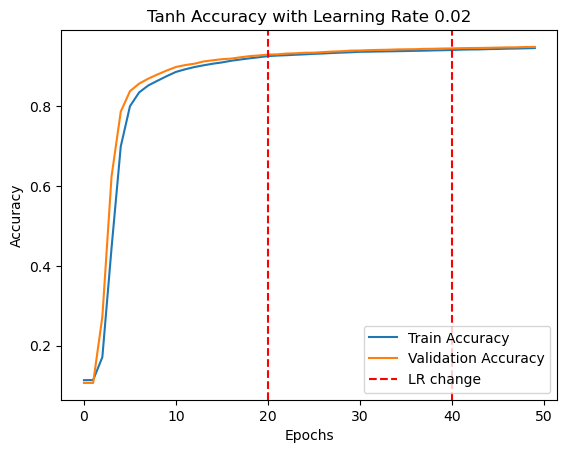

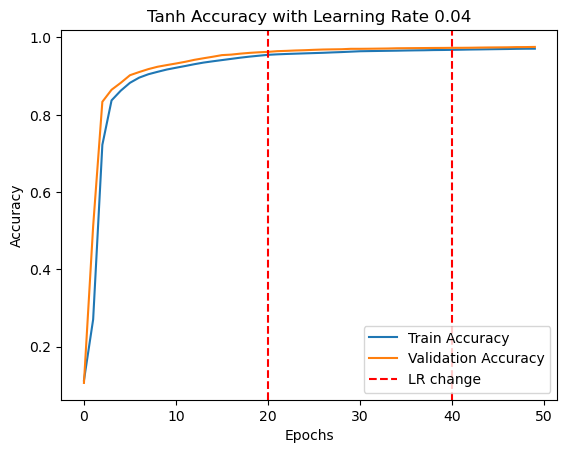

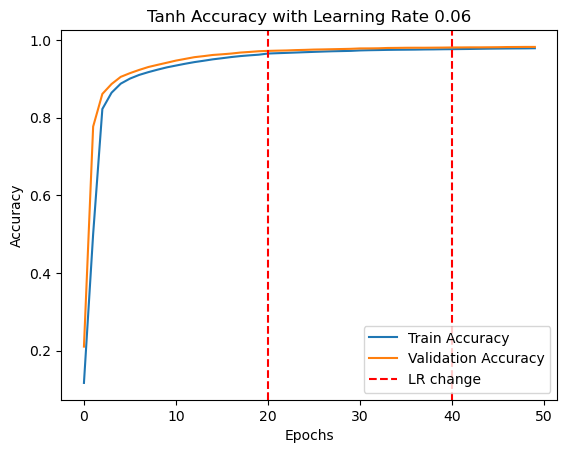

In [36]:
fig_1 = plt.figure(1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Tanh Accuracy with Learning Rate 0.02")
plt.plot(range(epochTrial1), training_accuracy_Trial1, label = "Train Accuracy")
plt.plot(range(epochTrial1), testing_accuracy_Trial1, label = "Validation Accuracy")
plt.axvline(x=20, color='r', linestyle='--', label='LR change')
plt.axvline(x=40, color='r', linestyle='--')
plt.legend()
plt.show()

fig_2 = plt.figure(2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Tanh Accuracy with Learning Rate 0.04")
plt.plot(range(epochTrial2), training_accuracy_Trial2, label = "Train Accuracy")
plt.plot(range(epochTrial2), testing_accuracy_Trial2, label = "Validation Accuracy")
plt.axvline(x=20, color='r', linestyle='--', label='LR change')
plt.axvline(x=40, color='r', linestyle='--')
plt.legend()
plt.show()

fig_3 = plt.figure(3)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Tanh Accuracy with Learning Rate 0.06")
plt.plot(range(epochTrial3), training_accuracy_Trial3, label = "Train Accuracy")
plt.plot(range(epochTrial3), testing_accuracy_Trial3, label = "Validation Accuracy")
plt.axvline(x=20, color='r', linestyle='--', label='LR change')
plt.axvline(x=40, color='r', linestyle='--')
plt.legend()
plt.show()



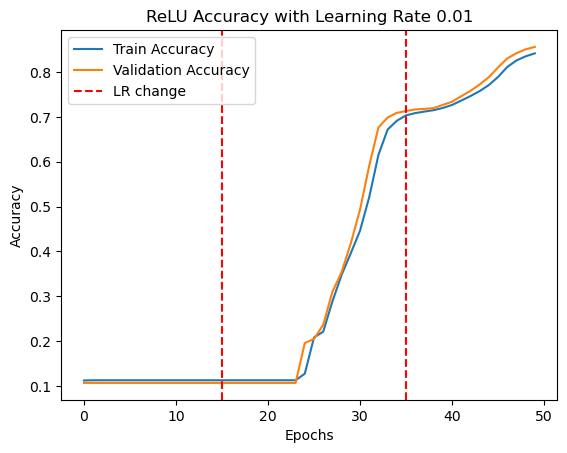

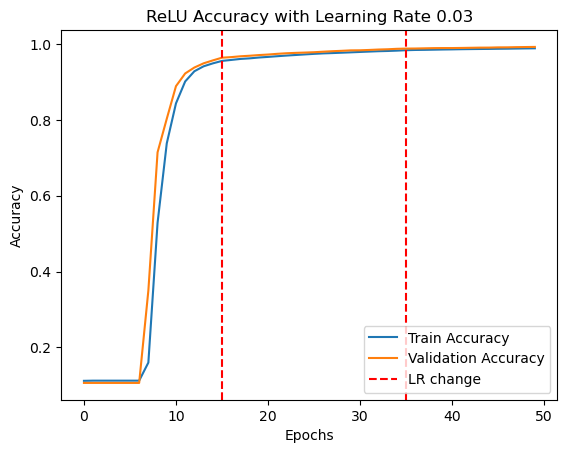

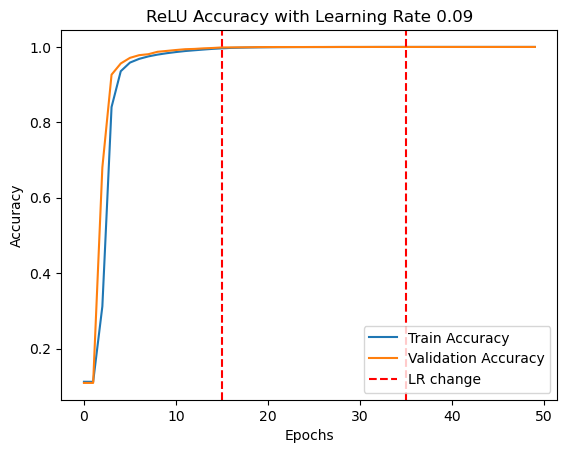

In [50]:
fig_4 = plt.figure(4)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ReLU Accuracy with Learning Rate 0.01")
plt.plot(range(epochRelu1), training_accuracy_Relu1, label = "Train Accuracy")
plt.plot(range(epochRelu1), testing_accuracy_Relu1, label = "Validation Accuracy")
plt.axvline(x=15, color='r', linestyle='--', label='LR change')
plt.axvline(x=35, color='r', linestyle='--')
plt.legend()
plt.show()

fig_5 = plt.figure(5)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ReLU Accuracy with Learning Rate 0.03")
plt.plot(range(epochRelu2), training_accuracy_Relu2, label = "Train Accuracy")
plt.plot(range(epochRelu2), testing_accuracy_Relu2, label = "Validation Accuracy")
plt.axvline(x=15, color='r', linestyle='--', label='LR change')
plt.axvline(x=35, color='r', linestyle='--')
plt.legend()
plt.show()

fig_6 = plt.figure(6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ReLU Accuracy with Learning Rate 0.09")
plt.plot(range(epochRelu3), training_accuracy_Relu3, label = "Train Accuracy")
plt.plot(range(epochRelu3), testing_accuracy_Relu3, label = "Validation Accuracy")
plt.axvline(x=15, color='r', linestyle='--', label='LR change')
plt.axvline(x=35, color='r', linestyle='--')
plt.legend()
plt.show()

In [49]:
print("Final Tanh lr =", learnrate_Trial1 * 4 , ":", testing_accuracy_Trial1[epochTrial1 - 1]*100)
print("Final Tanh lr =", learnrate_Trial2 * 4 , ":", testing_accuracy_Trial2[epochTrial2 - 1]*100)
print("Final Tanh lr =", learnrate_Trial3 * 4 , ":", testing_accuracy_Trial3[epochTrial3 - 1]*100)


print("Final ReLU lr =", learnrate_Relu1 * 4 , ":", testing_accuracy_Relu1[epochRelu1 - 1]*100)
print("Final ReLU lr =", learnrate_Relu2 * 4, ":", testing_accuracy_Relu2[epochRelu2 - 1]*100)
print("Final ReLU lr =", learnrate_Relu3 * 4, ":", testing_accuracy_Relu3[epochRelu3 - 1]*100)

Final Tanh lr = 0.02 : 94.89
Final Tanh lr = 0.03 : 97.56
Final Tanh lr = 0.04 : 98.2
Final ReLU lr = 0.01 : 85.63
Final ReLU lr = 0.03 : 99.26
Final ReLU lr = 0.09 : 99.99


c) Choose the configuration (activation and initial learning rate) with the best validation accuracy. Train this for all 60,000 images = training + validation. Remember to apply a learning rate decay as before. After all 50 epochs are done test with the data in mnist testdata.hdf5 from the previous assignment. Record the final test accuracy.

Final Configuration

Activation Function  ->  Relu
Learning Rate        ->  0.09

In [57]:
epochfinal = 50

learnrate_1_final = 14
learnrate_2_final = 34

batch_size = 50
# Network configuration & parameter initialization: 2 layers with 200 neurons in the first layer and 100 neurons in the second layer.
w1_final = np.random.normal(0, 0.001, [200, 784])
w2_final = np.random.normal(0, 0.001, [100, 200])
w3_final = np.random.normal(0, 0.001, [10, 100])
b1_final = np.random.normal(0, 0.001, [200,])
b2_final = np.random.normal(0, 0.001, [100,])
b3_final = np.random.normal(0, 0.001, [10,])
learnrate_final = 0.09

training_accuracy_final = []

for i in range(epochfinal):
    w1_fianl, w2_final, w3_final, b1_final, b2_final, b3_final, train_accuracy = training(w1_final, w2_final, w3_final, b1_final, b2_final, b3_final, batch_size, learnrate_final, xdata, ydata,relu,relu_grad)

    if i == learnrate_1_final or i == learnrate_2_final: # Dividing the epoch value by 2 after 14th & 34th epoch.
        learnrate_final /= 2

    training_accuracy_final.append(train_accuracy)

test_accuracy = forwardpropagation(w1_Relu2, w2_Relu2, w3_Relu2, b1_Relu2, b2_Relu2, b3_Relu2, x_test, y_test,relu)

Final Train Accuracy: 99.99833333333333
Final Test Accuracy: 97.21


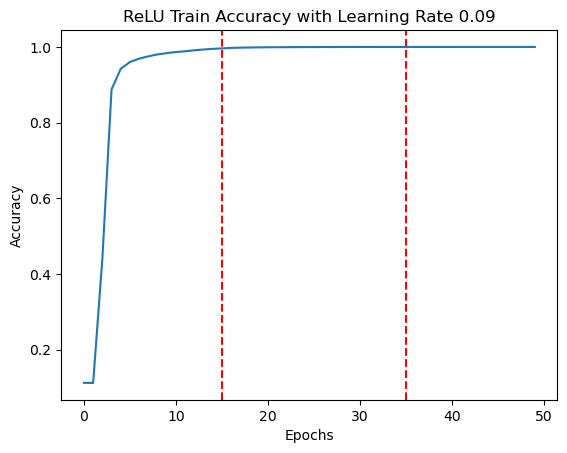

In [60]:
print("Final Train Accuracy:", training_accuracy_final[epochfinal - 1]*100)
print("Final Test Accuracy:", test_accuracy*100)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ReLU Train Accuracy with Learning Rate 0.09")
plt.axvline(x=15, color='r', linestyle='--', label='LR change')
plt.axvline(x=35, color='r', linestyle='--')
plt.plot(range(epochfinal), training_accuracy_final)
plt.show()